In [1]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import pdist, squareform

import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

# Experimento 0

En este notebook ejecutaremos el experimento 0. En este experimento vamos a implementar un algoritmo de KNN. La función de similitud que usaremos es `equal` sobre la información de la película en la matriz de propiedades binarias.

Para medir la eficiencia de este algoritmo recuperaremos las K películas más similares a la película de la query. Medimos la media de la similitud de esa película con respecto a las K películas recuperadas.

In [2]:
# Cargamos los datos binarias
binary_properties = pd.read_csv('data/experiment_data/movies_binary.csv')

In [3]:
# Creamos la función de similitud
# ¡OJO! Para evitar similitudes muy altas (debido a la cantidad de ceros)
# solo contamos, para la similitud, las propiedades que tengan valor 1 en
# alguno de los items.
def equal_sim(item1, item2):
    dif = 0
    atr = 0
    for i in range(len(item1)):
        if item1[i] != item2[i]:
            dif = dif + 1
        if item1[i] == 1 or item2[i] == 1:
            atr = atr + 1
    return float(atr - dif)/float(atr)

In [4]:
# Calculamos las similitudes entre películas
movies_prop = binary_properties.drop(columns=['id']).values
movies_sim = pdist(movies_prop, equal_sim)
movies_similarity = pd.DataFrame(squareform(movies_sim))

In [5]:
movies_similarity.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.000000,0.030303,0.000000,0.062500,0.000000,0.000000,0.000000,0.062500,0.062500,0.029412,...,0.027778,0.206897,0.096774,0.000000,0.060606,0.000000,0.172414,0.030303,0.000000,0.030303
1,0.030303,0.000000,0.031250,0.000000,0.028571,0.033333,0.000000,0.032258,0.066667,0.100000,...,0.000000,0.031250,0.066667,0.068966,0.031250,0.000000,0.066667,0.103448,0.062500,0.103448
2,0.000000,0.031250,0.000000,0.031250,0.088235,0.066667,0.000000,0.031250,0.000000,0.062500,...,0.000000,0.000000,0.000000,0.032258,0.000000,0.031250,0.000000,0.031250,0.029412,0.064516
3,0.062500,0.000000,0.031250,0.000000,0.028571,0.000000,0.032258,0.066667,0.000000,0.000000,...,0.029412,0.064516,0.000000,0.000000,0.031250,0.032258,0.032258,0.000000,0.030303,0.000000
4,0.000000,0.028571,0.088235,0.028571,0.000000,0.129032,0.028571,0.028571,0.000000,0.027778,...,0.054054,0.000000,0.000000,0.060606,0.057143,0.028571,0.000000,0.028571,0.085714,0.028571


In [6]:
# Mostramos la información estadística de las similitudes de cada película con respecto las otras
movies_description = movies_similarity.describe()
movies_description

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.037582,0.035192,0.026921,0.027492,0.037030,0.021128,0.015465,0.033281,0.040139,0.042594,...,0.025950,0.030919,0.035973,0.032434,0.045773,0.026873,0.037100,0.040934,0.046373,0.050223
std,0.048103,0.032001,0.029061,0.024199,0.036219,0.032247,0.020265,0.028150,0.036697,0.043639,...,0.029264,0.041519,0.036349,0.035587,0.086323,0.019958,0.041141,0.040766,0.041473,0.044838
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028571,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.029412,0.021429,0.000000,0.000000,0.029412,0.000000
50%,0.029412,0.031250,0.029857,0.031250,0.028571,0.000000,0.000000,0.032258,0.033333,0.031250,...,0.028571,0.030303,0.032258,0.032258,0.031250,0.031250,0.031250,0.031754,0.031250,0.033333
75%,0.060606,0.064516,0.032527,0.034483,0.057143,0.033333,0.032258,0.034483,0.064516,0.064516,...,0.037707,0.032258,0.064516,0.062500,0.057563,0.033333,0.064516,0.065054,0.062500,0.091619
max,0.266667,0.103448,0.103448,0.100000,0.147059,0.142857,0.096774,0.166667,0.178571,0.214286,...,0.125000,0.206897,0.111111,0.200000,0.700000,0.107143,0.178571,0.185185,0.214286,0.214286


## Gráfica con los resultados estadísticos

In [7]:
x = movies_description.columns.values
y = movies_description.iloc[1].values
max_values = movies_description.iloc[7].values

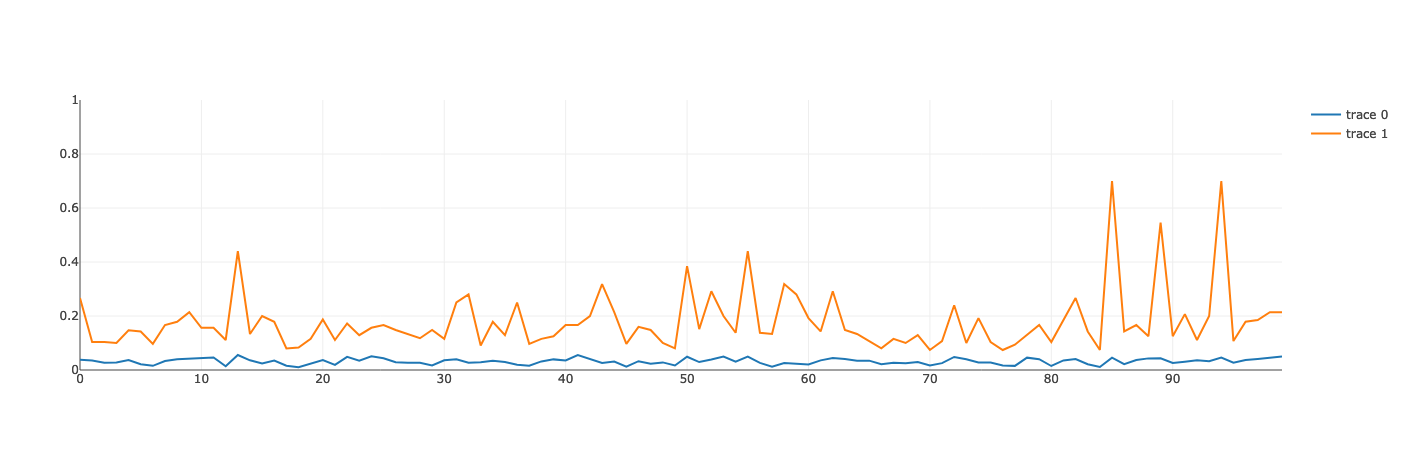

In [14]:
trace = go.Scatter(
    x = x,
    y = y
)

trace2 = go.Scatter(
    x = x,
    y = max_values
)

data = [trace, trace2]

layout = go.Layout(
    yaxis = dict(
        range=[0,1]
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='basic-line')